In [17]:
import numpy as np
import matplotlib.pyplot as plt
import zeus21
from classy import Class
from zeus21.cosmology import growth, dgrowth_dz, Hub

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [18]:
ClassCosmo = Class()
params = {'output': 'mPk',
          'n_s': 0.965, 
          'H0': 67.4,
          'omega_b': 0.0224,
          'omega_cdm': 0.12,
          'tau_reio': 0.054,
          'sigma8': 0.811,
          'P_k_max_1/Mpc': 10
          }
ClassCosmo.set(params)
ClassCosmo.compute()

In [19]:
UserParams = zeus21.User_Parameters(precisionboost=1.2)
CosmoParams_input = zeus21.Cosmo_Parameters_Input()
ClassyCosmo = zeus21.runclass(CosmoParams_input)
CosmoParams = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input, ClassyCosmo)

In [20]:
a_list = np.linspace(0.01, 1., 1000)
z_list = 1 / a_list - 1

In [21]:
growth_zeus = growth(CosmoParams, z_list)
dgrowth_zeus = dgrowth_dz(CosmoParams, z_list)

/Users/yuranzhang/Desktop/untitled folder 5/marc/Zeus21/zeus21/cosmology.py:346: RuntimeWarning: invalid value encountered in divide
  return (growth(CosmoParams, z+dzlist)-growth(CosmoParams, z-dzlist))/(2.0*dzlist)


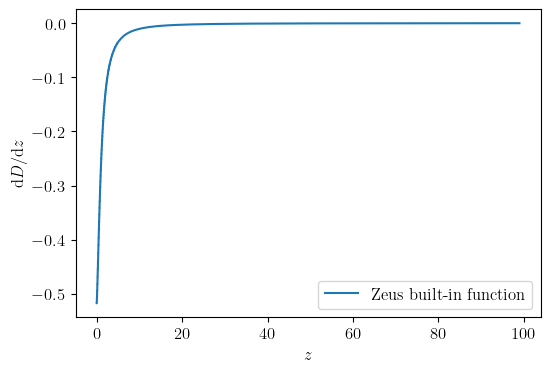

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(z_list, dgrowth_zeus, label='Zeus built-in function')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\mathrm{d}D/\mathrm{d}z$')
ax.legend()

$$
\frac{\mathrm{d}D}{\mathrm{d}\tau}
=\frac{\mathrm{d}D}{\mathrm{d}z} \frac{\mathrm{d}z}{\mathrm{d}a} \frac{\mathrm{d}a}{\mathrm{d}t} \frac{\mathrm{d}t}{\mathrm{d}\tau}
=\frac{\mathrm{d}D}{\mathrm{d}z} \cdot \left(-\frac{1}{a^2}\right) \cdot aH \cdot a
=-\frac{\mathrm{d}D}{\mathrm{d}z} H
$$

In [23]:
hubble = Hub(CosmoParams, z_list)
dgrowth_dtau = -dgrowth_zeus * hubble

In [24]:
# Carroll+ approximation
Omega_m0 = 0.31
Omega_L0 = 1. - Omega_m0

def D_approx(a):
    D_approx = 5 / 2 * a * Omega_m0 / (Omega_m0**(4/7) - Omega_L0 + (1 + Omega_m0/2) * (1 + Omega_L0/70))
    D_approx_normalized = D_approx / D_approx[-1]
    return D_approx_normalized

def dD_dtau(D, a):
    dD_da = np.gradient(D, a)
    z = 1 / a - 1
    return dD_da * a**2 * Hub(CosmoParams, z)

growth_approx = D_approx(a_list)
dgrowth_dtau_approx = dD_dtau(D_approx(a_list), a_list)

Text(0.5, 1.0, 'Conformal time derivative of growth factor')

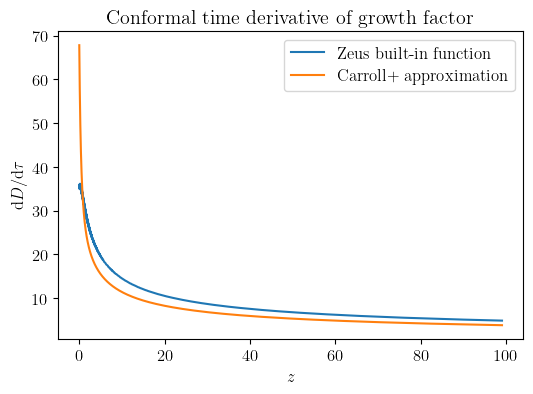

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(z_list, dgrowth_dtau, label=r'Zeus built-in function')
ax.plot(z_list, dgrowth_dtau_approx, label='Carroll+ approximation')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\mathrm{d}D/\mathrm{d}\tau$')
ax.legend()
ax.set_title(r'Conformal time derivative of growth factor')